Importacion de bibliotecas para visualizar los datos

Importacion de librerias que se usaran en los ejercicios

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Abrir el documentos CVS para obtener los datos

In [14]:
data = pd.read_csv("Titanic-Dataset.csv", index_col='PassengerId')

================ PREGUNTAS REALIZADAS DURANTE EL EJERCICIO ================

1.	¿Cuál es la edad promedio de los pasajeros? ¿Existe alguna relación entre la edad y la clase de boleto?

In [17]:
# Calcular el promedio de la edad
print("\n========== Obtener el promedio de la edad ==========")
print("El promedio de edad es: ", data['Age'].mean())


========== Obtener el promedio de la edad ==========
El promedio de edad es:  29.69911764705882


In [18]:
# Obtener informacion sobre edad y ticket
print("\n========== Obtener información de edad y ticket ==========")
Estadisticas = data.groupby('Ticket')['Age'].describe()
print(Estadisticas)


========== Obtener información de edad y ticket ==========
             count       mean        std   min    25%   50%    75%   max
Ticket                                                                  
110152         3.0  26.333333   9.073772  16.0  23.00  30.0  31.50  33.0
110413         3.0  36.333333  17.156146  18.0  28.50  39.0  45.50  52.0
110465         1.0  47.000000        NaN  47.0  47.00  47.0  47.00  47.0
110564         1.0  28.000000        NaN  28.0  28.00  28.0  28.00  28.0
110813         1.0  60.000000        NaN  60.0  60.00  60.0  60.00  60.0
...            ...        ...        ...   ...    ...   ...    ...   ...
W./C. 6608     4.0  23.500000  17.058722   9.0  14.25  18.5  27.75  48.0
W./C. 6609     0.0        NaN        NaN   NaN    NaN   NaN    NaN   NaN
W.E.P. 5734    1.0  46.000000        NaN  46.0  46.00  46.0  46.00  46.0
W/C 14208      1.0  30.000000        NaN  30.0  30.00  30.0  30.00  30.0
WE/P 5735      2.0  53.000000  24.041631  36.0  44.50  53.0  61.

2.	Examina si existe alguna relación aparente entre las tarifas pagadas y la supervivencia de los pasajeros

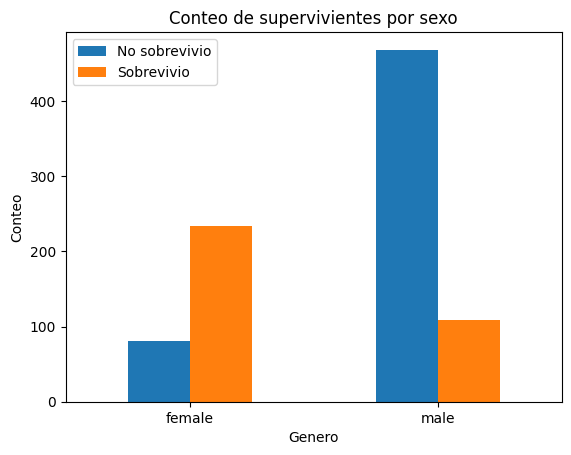

In [12]:
survival_by_gender = data.groupby(['Sex', 'Survived']).size().unstack()

survival_by_gender.plot(kind='bar', stacked=False)
plt.xlabel('Genero')
plt.ylabel('Conteo')
plt.title('Conteo de supervivientes por sexo')
plt.xticks(rotation=0)
plt.legend(['No sobrevivio', 'Sobrevivio'], loc='upper left')
plt.show()